In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

vaccinations_df = pd.read_csv('../resources/country_vaccinations.csv')
vaccinations_df.head(20)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Algeria,DZA,1/29/2021,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Algeria,DZA,1/30/2021,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
2,Andorra,AND,1/25/2021,576.0,576.0,NaN,NaN,NaN,0.75,0.75,NaN,NaN,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
3,Andorra,AND,1/26/2021,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
4,Andorra,AND,1/27/2021,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
5,Andorra,AND,1/28/2021,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
6,Andorra,AND,1/29/2021,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
7,Andorra,AND,1/30/2021,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
8,Andorra,AND,1/31/2021,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
9,Andorra,AND,2/1/2021,1036.0,1036.0,NaN,NaN,66.0,1.34,1.34,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...


In [2]:
# identify csv
owid_data_df = pd.read_csv('../resources/owid-covid-data.csv')
owid_data_df.head(20)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2/24/2020,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2/25/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2/26/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2/27/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2/28/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
5,AFG,Asia,Afghanistan,2/29/2020,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
6,AFG,Asia,Afghanistan,3/1/2020,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
7,AFG,Asia,Afghanistan,3/2/2020,1.0,0.0,0.000,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
8,AFG,Asia,Afghanistan,3/3/2020,2.0,1.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
9,AFG,Asia,Afghanistan,3/4/2020,4.0,2.0,0.429,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [3]:
owid_data_df['population'].head()

0    38928341.0
1    38928341.0
2    38928341.0
3    38928341.0
4    38928341.0
Name: population, dtype: float64

In [4]:
# Merge two dataframes using an left outer join
merge_df = pd.merge(vaccinations_df, owid_data_df, on=["iso_code","date"], how='left')
merge_df.head()

,country,iso_code,date,total_vaccinations_x,people_vaccinated_x,people_fully_vaccinated_x,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred_x,people_vaccinated_per_hundred_x,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Algeria,DZA,1/29/2021,0.0,NaN,NaN,NaN,NaN,0.00,NaN,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.9,76.88,0.754
1,Algeria,DZA,1/30/2021,30.0,NaN,NaN,30.0,30.0,0.00,NaN,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.9,76.88,0.754
2,Andorra,AND,1/25/2021,576.0,576.0,NaN,NaN,NaN,0.75,0.75,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.858
3,Andorra,AND,1/26/2021,NaN,NaN,NaN,NaN,66.0,NaN,NaN,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.858
4,Andorra,AND,1/27/2021,NaN,NaN,NaN,NaN,66.0,NaN,NaN,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.858


In [5]:
# look at columns to id which ones to omit
merge_df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations_x',
       'people_vaccinated_x', 'people_fully_vaccinated_x',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred_x', 'people_vaccinated_per_hundred_x',
       'people_fully_vaccinated_per_hundred_x',
       'daily_vaccinations_per_million', 'vaccines', 'source_name',
       'source_website', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'n

In [6]:
# confirm population merged correctly
merge_df['population'].head()

0    43851043.0
1    43851043.0
2       77265.0
3       77265.0
4       77265.0
Name: population, dtype: float64

In [7]:
merge_df.to_csv(path_or_buf="resources/merged_covid.csv", index=False)

In [8]:
# remove rows missing iso_code (England, Scotland, N. Irland, Wales data stored in GRB-United Kingdom)
merged_df_no_iso_code = merge_df.dropna(subset = ["iso_code"])
merged_df_no_iso_code.head()

,country,iso_code,date,total_vaccinations_x,people_vaccinated_x,people_fully_vaccinated_x,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred_x,people_vaccinated_per_hundred_x,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Algeria,DZA,1/29/2021,0.0,NaN,NaN,NaN,NaN,0.00,NaN,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.9,76.88,0.754
1,Algeria,DZA,1/30/2021,30.0,NaN,NaN,30.0,30.0,0.00,NaN,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.9,76.88,0.754
2,Andorra,AND,1/25/2021,576.0,576.0,NaN,NaN,NaN,0.75,0.75,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.858
3,Andorra,AND,1/26/2021,NaN,NaN,NaN,NaN,66.0,NaN,NaN,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.858
4,Andorra,AND,1/27/2021,NaN,NaN,NaN,NaN,66.0,NaN,NaN,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.858


In [9]:
# confirm population merged correctly
merged_df_no_iso_code["population"].head()

0    43851043.0
1    43851043.0
2       77265.0
3       77265.0
4       77265.0
Name: population, dtype: float64

In [10]:
merged_df_no_iso_code.to_csv(path_or_buf="resources/merged_df_no_iso_code.csv", index=False)

In [11]:
# Reorganizing the columns using double brackets
organized_df = merged_df_no_iso_code[['country', 'iso_code', 'date', 'daily_vaccinations', 'new_cases_smoothed']]

organized_df.head()

,country,iso_code,date,daily_vaccinations,new_cases_smoothed
0,Algeria,DZA,1/29/2021,NaN,251.857
1,Algeria,DZA,1/30/2021,30.0,250.429
2,Andorra,AND,1/25/2021,NaN,73.286
3,Andorra,AND,1/26/2021,66.0,63.429
4,Andorra,AND,1/27/2021,66.0,58.286


In [12]:
countries_df = organized_df.groupby(['country'])['daily_vaccinations'].sum()
countries_df.head()

country
Algeria          30.0
Andorra         462.0
Argentina    403907.0
Austria      204947.0
Bahrain      151888.0
Name: daily_vaccinations, dtype: float64

In [13]:
population = merged_df_no_iso_code[['country','iso_code','population','population_density']]
population_df= pd.DataFrame(population)
population_groupby_df = population_df.groupby(['country'])
population_df.head()

population_var = population_groupby_df['population'].first()
population_density_var = population_groupby_df['population_density'].first()
pop = {'Population': population_var, 'Population Density': population_density_var}

pop_df = pd.DataFrame(pop)

pop_df

,Population,Population Density
country,,
Algeria,43851043.0,17.348
Andorra,77265.0,163.755
Argentina,45195777.0,16.177
Austria,9006400.0,106.749
Bahrain,1701583.0,1935.907
...,...,...
Switzerland,8654618.0,214.243
Turkey,84339067.0,104.914
United Arab Emirates,9890400.0,112.442


In [14]:
country_vac_pop_cases_merge_df = pd.merge(pop_df, countries_df, on=['country'], how='outer')
country_vac_pop_cases_merge_df

,Population,Population Density,daily_vaccinations
country,,,
Algeria,43851043.0,17.348,30.0
Andorra,77265.0,163.755,462.0
Argentina,45195777.0,16.177,403907.0
Austria,9006400.0,106.749,204947.0
Bahrain,1701583.0,1935.907,151888.0
...,...,...,...
Switzerland,8654618.0,214.243,263938.0
Turkey,84339067.0,104.914,2774851.0
United Arab Emirates,9890400.0,112.442,2549317.0


In [15]:
country_vac_pop_cases_merge_df.reset_index(inplace = True)

In [16]:
# create bins for country's population sizes
bins = [0, 4000000, 18000000, 1500000000]
group_names = ["small", "medium", "large"]

country_vac_pop_cases_merge_df['Population_binned'] = pd.cut(country_vac_pop_cases_merge_df['Population'], bins = bins, labels = group_names)
country_vac_pop_cases_merge_df

#Select all the rows with population_binned as small save it inside a new dataframe
# Select just the column population density with the rows having its population as small
small_country_df = country_vac_pop_cases_merge_df.loc[ country_vac_pop_cases_merge_df["Population_binned"]=="small", :]
small_country_df.head()

#sort daily vaccines by descending
sorted_small_country_df = small_country_df.sort_values(by='daily_vaccinations', ascending=False)
sorted_small_country_df

,country,Population,Population Density,daily_vaccinations,Population_binned
4,Bahrain,1701583.0,1935.907,151888.0,small
41,Lithuania,2722291.0,45.135,100285.0,small
64,Slovenia,2078932.0,102.619,84689.0,small
21,Estonia,1326539.0,31.033,38587.0,small
44,Malta,441539.0,1454.037,28028.0,small
40,Latvia,1886202.0,31.212,26114.0,small
61,Seychelles,98340.0,208.354,25169.0,small
16,Cyprus,875899.0,127.657,19565.0,small
31,Iceland,341250.0,3.404,11646.0,small
42,Luxembourg,625976.0,231.447,11207.0,small


In [17]:
# new column: percent vaccinated by population (daily vaccinations/total population)
small_country_percent_vaccinated = sorted_small_country_df["daily_vaccinations"] / sorted_small_country_df["Population"]*100

sorted_small_country_df['Percent Vaccinated']= small_country_percent_vaccinated
sorted_small_country_df = sorted_small_country_df.sort_values(by='Percent Vaccinated', ascending=False).iloc[:5,:]
sorted_small_country_df
#small_country_percent_vaccinated.sort_values(by='small_country_percent_vaccinated', ascending=False)

,country,Population,Population Density,daily_vaccinations,Population_binned,Percent Vaccinated
61,Seychelles,98340.0,208.354,25169.0,small,25.593858
4,Bahrain,1701583.0,1935.907,151888.0,small,8.926276
44,Malta,441539.0,1454.037,28028.0,small,6.347797
46,Monaco,39244.0,19347.500,2394.0,small,6.100296
64,Slovenia,2078932.0,102.619,84689.0,small,4.073678


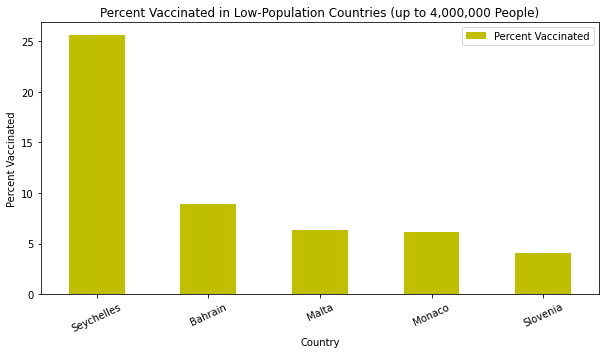

<Figure size 432x288 with 0 Axes>

In [18]:
# bar chart - all small countries percent vaccinated
x_axis = sorted_small_country_df['country']
y_axis = sorted_small_country_df['Percent Vaccinated']

# Use DataFrame.plot() in order to create a bar chart of the data
sorted_small_country_df.plot(kind="bar", x='country', y='Percent Vaccinated', figsize=(10,5), color='y')

# Set a title for the chart
plt.title("Percent Vaccinated in Low-Population Countries (up to 4,000,000 People)")
plt.xlabel("Country")
plt.ylabel("Percent Vaccinated")
plt.xticks(rotation = 25)
plt.savefig("visualizations/small_percent_vaccinated")
plt.show()
plt.tight_layout()

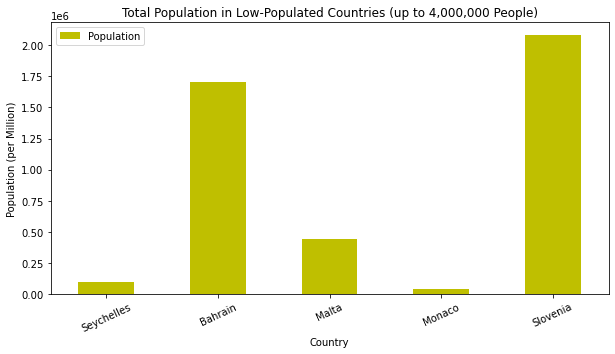

<Figure size 432x288 with 0 Axes>

In [19]:
# bar chart - all small countries sorted by population
x_axis = sorted_small_country_df['country']
y_axis = sorted_small_country_df['Population']

# Use DataFrame.plot() in order to create a bar chart of the data
sorted_small_country_df.plot(kind="bar", x='country', y='Population', figsize=(10,5), color='y')

# Set a title for the chart
plt.title("Total Population in Low-Populated Countries (up to 4,000,000 People)")
plt.xlabel("Country")
plt.ylabel("Population (per Million)")
plt.xticks(rotation = 25)
plt.savefig("visualizations/small_tot_pop")
plt.show()
plt.tight_layout()

In [20]:
# binned countries with medium-size population (4,000,001 - 18,000,000ppl); 
# sorted by highest to lowest vaccines to date
medium_country_df = country_vac_pop_cases_merge_df.loc[country_vac_pop_cases_merge_df["Population_binned"]=="medium", :]
medium_country_df.head()

#sort daily vaccines by descending
sorted_medium_country_df = medium_country_df.sort_values(by='daily_vaccinations', ascending=False)
sorted_medium_country_df

,country,Population,Population Density,daily_vaccinations,Population_binned
36,Israel,8655541.0,402.606,4946914.0,medium
70,United Arab Emirates,9890400.0,112.442,2549317.0,medium
60,Serbia,6804596.0,80.291,456110.0,medium
55,Portugal,10196707.0,112.371,352846.0,medium
6,Belgium,11589616.0,375.564,305594.0,medium
30,Hungary,9660350.0,108.043,289943.0,medium
17,Czechia,10708982.0,137.176,286165.0,medium
27,Greece,10423056.0,83.479,283969.0,medium
18,Denmark,5792203.0,136.520,278265.0,medium
67,Sweden,10099270.0,24.718,267958.0,medium


In [21]:
medium_country_percent_vaccinated = sorted_medium_country_df["daily_vaccinations"] / sorted_medium_country_df["Population"]*100

sorted_medium_country_df['Percent Vaccinated']= medium_country_percent_vaccinated
sorted_medium_country_df = sorted_medium_country_df.sort_values(by='Percent Vaccinated', ascending=False).iloc[:5,:]
sorted_medium_country_df

,country,Population,Population Density,daily_vaccinations,Population_binned,Percent Vaccinated
36,Israel,8655541.0,402.606,4946914.0,medium,57.153146
70,United Arab Emirates,9890400.0,112.442,2549317.0,medium,25.775671
60,Serbia,6804596.0,80.291,456110.0,medium,6.702970
18,Denmark,5792203.0,136.520,278265.0,medium,4.804131
34,Ireland,4937796.0,69.874,172723.0,medium,3.497978


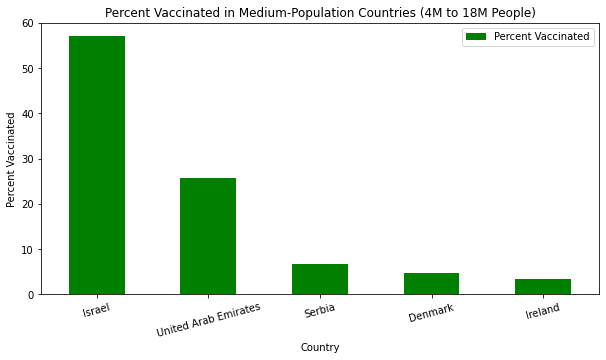

<Figure size 432x288 with 0 Axes>

In [22]:
# bar chart - all small countries percent vaccinated
x_axis = sorted_medium_country_df['country']
y_axis = sorted_medium_country_df['Percent Vaccinated']

# Use DataFrame.plot() in order to create a bar chart of the data
sorted_medium_country_df.plot(kind="bar", x='country', y='Percent Vaccinated', figsize=(10,5), color='g')

# Set a title for the chart
plt.title("Percent Vaccinated in Medium-Population Countries (4M to 18M People)")
plt.xlabel("Country")
plt.ylabel("Percent Vaccinated")
plt.xticks(rotation = 15)
plt.savefig("visualizations/medium_percent_vaccinated")
plt.show()
plt.tight_layout()

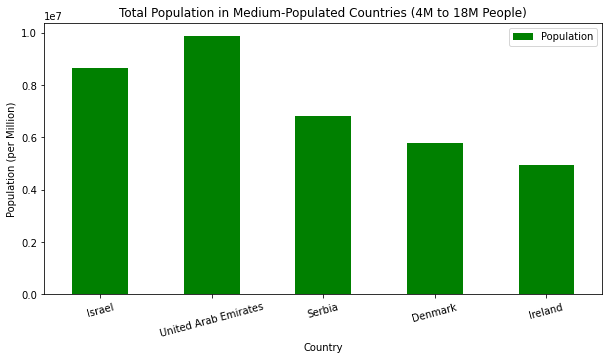

<Figure size 432x288 with 0 Axes>

In [23]:
# bar chart - medium countries sorted by population
x_axis = sorted_medium_country_df['country']
y_axis = sorted_medium_country_df['Population']

# Use DataFrame.plot() in order to create a bar chart of the data
sorted_medium_country_df.plot(kind="bar", x='country', y='Population', figsize=(10,5), color='g')

# Set a title for the chart
plt.title("Total Population in Medium-Populated Countries (4M to 18M People)")
plt.xlabel("Country")
plt.ylabel("Population (per Million)")
plt.xticks(rotation = 15)
plt.savefig("visualizations/medium_tot_pop")
plt.show()
plt.tight_layout()

In [24]:
# binned countries with large-size population (18,000,001 - 1,500,000,000ppl); 
# sorted by highest to lowest vaccines to date
large_country_df = country_vac_pop_cases_merge_df.loc[country_vac_pop_cases_merge_df["Population_binned"]=="large", :]
large_country_df.head()

#sort daily vaccines by descending
sorted_large_country_df = large_country_df.sort_values(by='daily_vaccinations', ascending=False)
sorted_large_country_df

,country,Population,Population Density,daily_vaccinations,Population_binned
72,United States,3.310026e+08,35.608,30369934.0,large
13,China,1.439324e+09,147.674,21794325.0,large
71,United Kingdom,6.788600e+07,272.898,8771153.0,large
32,India,1.380004e+09,450.419,4255107.0,large
69,Turkey,8.433907e+07,104.914,2774851.0,large
25,Germany,8.378394e+07,237.016,2503852.0,large
8,Brazil,2.125594e+08,25.040,2038642.0,large
37,Italy,6.046183e+07,205.859,1990610.0,large
65,Spain,4.675478e+07,93.105,1634287.0,large
24,France,6.527351e+07,122.578,1507553.0,large


In [25]:
large_country_percent_vaccinated = sorted_large_country_df["daily_vaccinations"] / sorted_large_country_df["Population"]*100

sorted_large_country_df['Percent Vaccinated']= large_country_percent_vaccinated
sorted_large_country_df = sorted_large_country_df.sort_values(by='Percent Vaccinated', ascending=False).iloc[:5,:]
sorted_large_country_df.reset_index(inplace = True)
sorted_large_country_df

,index,country,Population,Population Density,daily_vaccinations,Population_binned,Percent Vaccinated
0,71,United Kingdom,67886004.0,272.898,8771153.0,large,12.920414
1,72,United States,331002647.0,35.608,30369934.0,large,9.175133
2,56,Romania,19237682.0,85.129,697954.0,large,3.628057
3,65,Spain,46754783.0,93.105,1634287.0,large,3.495443
4,37,Italy,60461828.0,205.859,1990610.0,large,3.292342


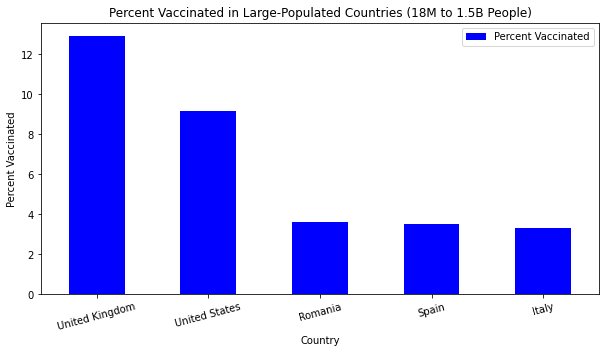

<Figure size 432x288 with 0 Axes>

In [26]:
# bar chart - large countries percent vaccinated
x_axis = sorted_large_country_df['country']
y_axis = sorted_large_country_df['Percent Vaccinated']

# Use DataFrame.plot() in order to create a bar chart of the data
sorted_large_country_df.plot(kind="bar", x='country', y='Percent Vaccinated', figsize=(10,5), color='b')

# Set a title for the chart
plt.title("Percent Vaccinated in Large-Populated Countries (18M to 1.5B People)")
plt.xlabel("Country")
plt.ylabel("Percent Vaccinated")
plt.xticks(rotation = 15)
plt.savefig("visualizations/large_percent_vaccinated")
plt.show()
plt.tight_layout()

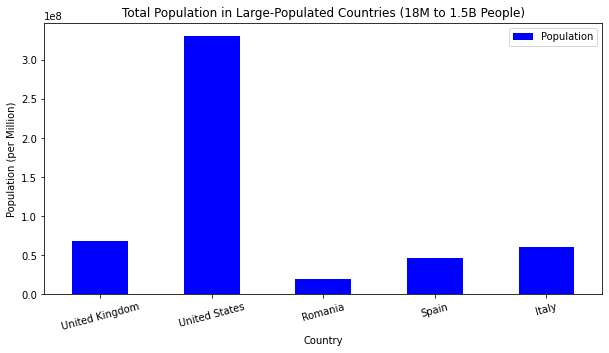

<Figure size 432x288 with 0 Axes>

In [27]:
# bar chart - large countries sorted by population
x_axis = sorted_large_country_df['country']
y_axis = sorted_large_country_df['Population']

# Use DataFrame.plot() in order to create a bar chart of the data
sorted_large_country_df.plot(kind="bar", x='country', y='Population', figsize=(10,5), color='b')

# Set a title for the chart
plt.title("Total Population in Large-Populated Countries (18M to 1.5B People)")
plt.xlabel("Country")
plt.ylabel("Population (per Million)")
plt.xticks(rotation = 15)
plt.savefig("visualizations/large_tot_pop")
plt.show()
plt.tight_layout()

In [28]:
# top 5 countries in each category:  % vaccinated by population (daily vaccinations/total population)
top_five_sm_md_bin_df = pd.concat([sorted_small_country_df,sorted_medium_country_df],axis=0)#top/bottom
top_five_s_m_l_bin_df = pd.concat([top_five_sm_md_bin_df,sorted_large_country_df],axis=0)
top_five_s_m_l_bin_df

,country,Population,Population Density,daily_vaccinations,Population_binned,Percent Vaccinated,index
61,Seychelles,98340.0,208.354,25169.0,small,25.593858,NaN
4,Bahrain,1701583.0,1935.907,151888.0,small,8.926276,NaN
44,Malta,441539.0,1454.037,28028.0,small,6.347797,NaN
46,Monaco,39244.0,19347.500,2394.0,small,6.100296,NaN
64,Slovenia,2078932.0,102.619,84689.0,small,4.073678,NaN
36,Israel,8655541.0,402.606,4946914.0,medium,57.153146,NaN
70,United Arab Emirates,9890400.0,112.442,2549317.0,medium,25.775671,NaN
60,Serbia,6804596.0,80.291,456110.0,medium,6.702970,NaN
18,Denmark,5792203.0,136.520,278265.0,medium,4.804131,NaN
34,Ireland,4937796.0,69.874,172723.0,medium,3.497978,NaN


In [29]:
# reset index
top_five_s_m_l_bin_df.reset_index(inplace = True)
top_five_s_m_l_bin_df

,level_0,country,Population,Population Density,daily_vaccinations,Population_binned,Percent Vaccinated,index
0,61,Seychelles,98340.0,208.354,25169.0,small,25.593858,NaN
1,4,Bahrain,1701583.0,1935.907,151888.0,small,8.926276,NaN
2,44,Malta,441539.0,1454.037,28028.0,small,6.347797,NaN
3,46,Monaco,39244.0,19347.500,2394.0,small,6.100296,NaN
4,64,Slovenia,2078932.0,102.619,84689.0,small,4.073678,NaN
5,36,Israel,8655541.0,402.606,4946914.0,medium,57.153146,NaN
6,70,United Arab Emirates,9890400.0,112.442,2549317.0,medium,25.775671,NaN
7,60,Serbia,6804596.0,80.291,456110.0,medium,6.702970,NaN
8,18,Denmark,5792203.0,136.520,278265.0,medium,4.804131,NaN
9,34,Ireland,4937796.0,69.874,172723.0,medium,3.497978,NaN


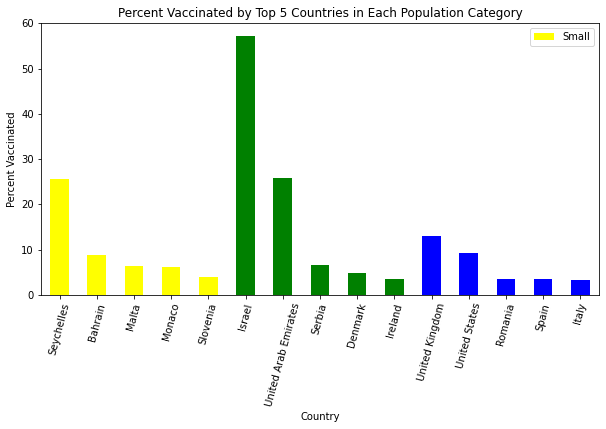

<Figure size 432x288 with 0 Axes>

In [30]:
x_axis = top_five_s_m_l_bin_df['country']
y_axis = top_five_s_m_l_bin_df['Percent Vaccinated']

# height = np.arange(len(x_axis))

# Use DataFrame.plot() in order to create a bar chart of the data
top_five_s_m_l_bin_df.plot(kind="bar", x='country', y='Percent Vaccinated', figsize=(10,5),color=['yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'green','green','green','green','green', 'blue', 'blue', 'blue', 'blue', 'blue'])

# Set a title for the chart
plt.title("Percent Vaccinated by Top 5 Countries in Each Population Category")
plt.xlabel("Country")
plt.ylabel("Percent Vaccinated")
plt.xticks(rotation = 75)
plt.legend(['Small'])
     
plt.savefig("visualizations/top_five_s_m_l")
plt.show()
plt.tight_layout()

In [31]:
# top vaccines administered throughout the world
vaccines_used = merged_df_no_iso_code[['country','iso_code','population','population_density','vaccines']]
vaccine_co = pd.DataFrame(vaccines_used)
vaccine_co.head()

,country,iso_code,population,population_density,vaccines
0,Algeria,DZA,43851043.0,17.348,Sputnik V
1,Algeria,DZA,43851043.0,17.348,Sputnik V
2,Andorra,AND,77265.0,163.755,Pfizer/BioNTech
3,Andorra,AND,77265.0,163.755,Pfizer/BioNTech
4,Andorra,AND,77265.0,163.755,Pfizer/BioNTech


In [32]:
# widely used vaccine name
vaccines_by_country = vaccine_co.sort_values(by=['vaccines'])
vaccines_by_country.head()

,country,iso_code,population,population_density,vaccines
360,China,CHN,1.439324e+09,147.674,"CNBG, Sinovac"
345,China,CHN,1.439324e+09,147.674,"CNBG, Sinovac"
344,China,CHN,1.439324e+09,147.674,"CNBG, Sinovac"
343,China,CHN,1.439324e+09,147.674,"CNBG, Sinovac"
342,China,CHN,1.439324e+09,147.674,"CNBG, Sinovac"


In [42]:
# setup df for israel line graphs
israel_df = merged_df_no_iso_code.loc[merged_df_no_iso_code["country"]=="Israel",:]

israel_data_df = israel_df[['country', 'iso_code', 'date', 'daily_vaccinations', 'new_cases_smoothed','people_fully_vaccinated_per_hundred_y']]
#israel_data_df

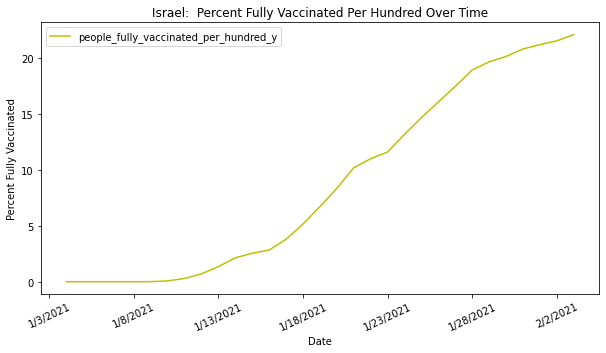

<Figure size 432x288 with 0 Axes>

In [43]:
# Israel - fully vaccinated
x_axis = israel_df['date']
y_axis = israel_df['people_fully_vaccinated_per_hundred_y']

# Use DataFrame.plot() in order to create a bar chart of the data
israel_df.plot(kind="line", x='date', y='people_fully_vaccinated_per_hundred_y', figsize=(10,5), color='y')

# Set a title for the chart
plt.title("Israel:  Percent Fully Vaccinated Per Hundred Over Time")
plt.xlabel("Date")
plt.ylabel("Percent Fully Vaccinated")
plt.xticks(rotation = 25)
plt.savefig("visualizations/israel_fully_vaccinated")
plt.show()
plt.tight_layout()


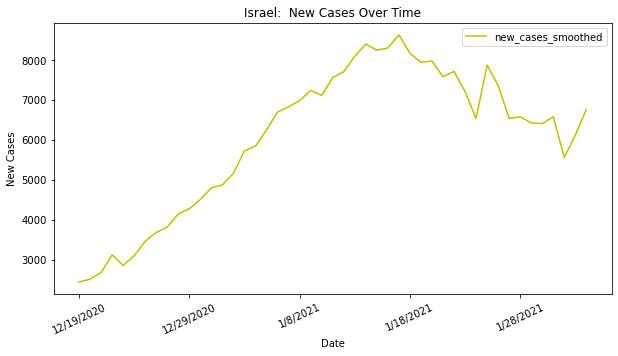

<Figure size 432x288 with 0 Axes>

In [44]:
# bar chart - Isreal New Cases Over Time
x_axis = israel_df['date']
y_axis = israel_df['new_cases_smoothed']

# Use DataFrame.plot() in order to create a bar chart of the data
israel_df.plot(kind="line", x='date', y='new_cases_smoothed', figsize=(10,5), color='y')

# Set a title for the chart
plt.title("Israel:  New Cases Over Time")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.xticks(rotation = 25)
plt.savefig("visualizations/israel_new_cases")
plt.show()
plt.tight_layout()
